# Import Libraries

In [1]:
# Data Manipulasi
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from scipy import stats
from sklearn.decomposition import PCA

# Modeling
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import optuna
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df_train = pd.read_csv('C:/Users/Nadiana Yemin Mukti/Documents/Churn Bank Customer/train.csv')
df_test = pd.read_csv('C:/Users/Nadiana Yemin Mukti/Documents/Churn Bank Customer/test.csv')

## Cuplikan Data

### Train

In [3]:
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


### Test

In [4]:
df_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,-11.546670,-7.073770,...,3.580278,-7.765934,59.0,1.0,-9.897690,5.694125,-6.734618,17.052251,3.601040,2.873498
1,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,-5.634876,1.937998,...,5.783655,15.667015,47.0,1.0,7.781887,9.752716,5.918369,15.922908,5.460557,10.475816
2,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,1.609005,-1.812488,...,-0.389116,8.523648,55.0,0.0,6.815214,-3.325532,4.123546,-19.656038,8.380318,-1.203315
3,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,-11.517734,-5.364282,...,3.930974,-13.912115,41.0,0.0,3.158137,-7.088875,-3.035983,34.277048,-3.169203,1.417681
4,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,-3.117576,2.004889,...,-4.056091,-14.432712,52.0,0.0,-3.867657,-13.308519,1.008302,41.449381,-0.804560,-0.649453


## Pengelompokkan kolom berdasarkan tipe data

In [5]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x22','x23','x24','x25','x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111','x113','x114','x115','x116','x117','x118','x119','x120','x121','x122', 'x123', 'x124', 'y']
cats = ['x112','x108','x89','x79','x21']
nums_test = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x22','x23','x24','x25','x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111','x113','x114','x115','x116','x117','x118','x119','x120','x121','x122', 'x123', 'x124']

*nums = tipe data numerikal untuk df_train

*cats = tipe data kategorikal untuk df_train

*nums_test = tipe data numerikal untuk df_test (tanpa kolom label)

In [6]:
# Split data frame berdasarkan tipe data

numerikal_train = df_train[nums].reset_index(drop=True)
kategorikal_train = df_train[cats].reset_index(drop=True)

numerikal_test = df_test[nums_test].reset_index(drop=True)
kategorikal_test = df_test[cats].reset_index(drop=True)

### Cuplikan data setelah split

In [7]:
# data train 

numerikal_train.sample(5) # data numerikal pada data frame df_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
44937,0.670939,-1.032285,5.781268,0.222059,-3.435761,5.778751,4.0,2.0,4.636558,-6.468616,...,-7.745226,44.0,1.0,6.818196,-2.481206,-11.549843,36.071994,1.134334,11.089816,0
82200,-0.729476,-3.007626,-0.032996,-0.046676,2.416484,4.868821,4.0,2.0,3.802985,8.038546,...,-19.170545,42.0,1.0,-4.415382,0.637026,-17.170415,57.581922,-0.249373,4.612259,0
97099,0.219564,6.611342,3.300569,-0.244369,-1.482981,-2.079939,3.0,3.0,-11.069321,-5.862725,...,5.020866,53.0,0.0,-3.561849,3.172705,-3.179537,16.620334,NaN,6.185194,0
32981,0.032551,0.485929,-7.499296,0.010625,-2.928157,-0.439740,4.0,2.0,-3.789127,2.619935,...,0.260538,55.0,0.0,-1.937799,-3.450516,7.201984,-41.940116,8.309659,-5.161398,0
47651,-0.285541,2.654785,NaN,0.004329,-2.321735,1.311742,6.0,1.0,8.966962,3.262659,...,-3.093494,48.0,0.0,5.410435,0.499875,-13.305063,51.318742,3.163914,-10.611311,0


In [8]:
kategorikal_train.sample(5) # data kategorikal pada data frame df_train

,x112,x108,x89,x79,x21
42790,May,SMA/SMK,Kalimantan Selatan,Perempuan,May
51932,Apr,SMP,Sumatera Barat,Perempuan,Jul
20056,Jul,SMA/SMK,Kalimantan Tengah,Laki-laki,Oct
29858,May,SMP,Kalimantan Timur,Perempuan,Jun
21884,May,SMP,Sulawesi Barat,Perempuan,Jun


In [9]:
# data test 

numerikal_test.sample(5) # data numerikal pada data frame df_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
9819,-0.236076,2.089627,-2.331199,-0.163711,-3.151258,-5.252593,4.0,3.0,-1.579523,-5.989597,...,-2.672036,-3.768107,55.0,1.0,-6.797596,-4.175638,-7.887211,11.268286,-1.250917,-2.501729
9233,0.308928,-1.325904,-0.043585,-0.063530,0.508747,-1.055664,3.0,1.0,8.829400,5.929601,...,0.398670,-4.239303,53.0,0.0,-7.510602,5.338998,14.811795,0.308818,5.879214,0.032925
7368,-0.207094,0.441934,1.329689,0.099450,-0.160305,-4.064734,4.0,4.0,13.434078,-2.902113,...,-16.413524,-1.194505,51.0,0.0,1.193018,7.926332,5.094882,-28.868461,-0.803732,-1.432121
1615,0.050668,-1.853046,0.714179,0.019756,-0.791985,-0.358530,7.0,3.0,-11.228586,-7.802668,...,3.720245,-0.539381,45.0,0.0,1.314280,-5.842551,-23.039489,-20.405788,-3.012884,0.850303
11136,0.392810,-2.417944,-0.641351,0.001042,-3.490055,3.038299,5.0,1.0,-8.048044,-2.228207,...,11.861139,-4.692419,39.0,0.0,15.357876,-5.366217,-1.549744,51.535760,9.245726,6.223504


In [10]:
kategorikal_test.sample(5) # data kategorikal pada data frame df_test

,x112,x108,x89,x79,x21
24474,Mar,SMP,Kalimantan Barat,Laki-laki,Jul
19911,Jul,SD,Kalimantan Barat,Laki-laki,Aug
18583,Jul,SMP,Kalimantan Barat,Perempuan,Jul
7047,Sep,SMA/SMK,Kalimantan Barat,Perempuan,May
3842,Jul,SMP,Sumatera Utara,Laki-laki,Jul


# Exploratory Data Analysis

## Descriptive Statistics

### Informasi General Dataframe

#### Train

In [11]:
# informasi general tentang dataframe

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 126 entries, x0 to y
dtypes: float64(120), int64(1), object(5)
memory usage: 96.1+ MB


In [12]:
# informasi pada dataframe df_train dengan jenis numerik

numerikal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 121 entries, x0 to y
dtypes: float64(120), int64(1)
memory usage: 92.3 MB


In [13]:
# informasi pada dataframe df_train dengan jenis kategorikal

kategorikal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x112    99858 non-null  object
 1   x108    99862 non-null  object
 2   x89     99875 non-null  object
 3   x79     99882 non-null  object
 4   x21     99874 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


#### Test

In [14]:
# informasi general tentang dataframe

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 125 entries, x0 to x124
dtypes: float64(120), object(5)
memory usage: 23.8+ MB


In [15]:
# informasi pada dataframe df_test dengan jenis numerik

numerikal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 120 entries, x0 to x124
dtypes: float64(120)
memory usage: 22.9 MB


In [16]:
# informasi pada dataframe df_test dengan jenis kategorikal

kategorikal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x112    24972 non-null  object
 1   x108    24971 non-null  object
 2   x89     24961 non-null  object
 3   x79     24969 non-null  object
 4   x21     24966 non-null  object
dtypes: object(5)
memory usage: 976.7+ KB


#### Hasil Pengamatan Informasi General Dataframe

Pengamatan:
1. Data train terdiri dari 100000 baris, dengan 126 kolom.
3. Data terdiri dari 120 float, 1 integer, dan 5 object.
4. Data tipe objek merupakan data pada kolom x112, x108, x89, x79, dan x21.
5. Data tipe integer terdapat pada kolom label (y).
6. Data test terdiri dari 25000 baris dengan 125 kolom (tanpa kolom label).

Tindak Lanjut:
1. Perhatikan data bertipe object, lakukan feature encoding.

### Informasi Missing Value dan Data Duplikat

In [17]:
# Informasi Jumlah dan Persentase Missing Value

## general

df_mv = df_train.isnull().sum() # menampilkan jumlah total missing value per kolom
df_pmv = (df_train.isnull().sum()/len(df_train))*100 # menampilkan persentase missing value per kolom

df_missing = pd.concat([df_mv,df_pmv],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value = df_missing

## numerikal

df_mv_numerikal = numerikal_train.isnull().sum() # menampilkan jumlah total missing value per kolom
df_pmv_numerikal = (numerikal_train.isnull().sum()/len(numerikal_train))*100 # menampilkan persentase missing value per kolom

df_missing_numerikal = pd.concat([df_mv_numerikal,df_pmv_numerikal],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing_numerikal.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value_numerikal = df_missing_numerikal

## kategorikal

df_mv_kategorikal = kategorikal_train.isnull().sum() # menampilkan jumlah total missing value per kolom
df_pmv_kategorikal = (kategorikal_train.isnull().sum()/len(kategorikal_train))*100 # menampilkan persentase missing value per kolom

df_missing_kategorikal = pd.concat([df_mv_kategorikal,df_pmv_kategorikal],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing_kategorikal.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value_kategorikal = df_missing_kategorikal


print('Data Missing Value:\n')
print(missing_value.sample(5),'\n')
print('Persentase Missing Value Terbesar                  : ',missing_value['Persentase Missing Value'].max())
print('Persentase Missing Value Keseluruhan               : ',missing_value['Persentase Missing Value'].sum())
print('Persentase Missing Value Tabel Numerikal (train)   : ',missing_value_numerikal['Persentase Missing Value'].sum())
print('Persentase Missing Value Tabel Kategorikal (train) : ',missing_value_kategorikal['Persentase Missing Value'].sum(),'\n')

print('Data Duplikat:\n')
print('Jumlah terdapat data duplikat pada data train         : ',df_train.duplicated().sum())
print('Jumlah terdapat data duplikat pada kolom x21 dan x112 : ',df_train.duplicated(subset=['x21','x112']).sum(),'(',(df_train.duplicated(subset=['x21','x112']).sum()/len(df_train))*100,'%',')')

Data Missing Value:

   Kolom  Jumlah Missing Value  Persentase Missing Value
42   x42                   137                     0.137
60   x60                   127                     0.127
8     x8                   134                     0.134
17   x17                   129                     0.129
72   x72                   149                     0.149 

Persentase Missing Value Terbesar                  :  0.159
Persentase Missing Value Keseluruhan               :  16.024
Persentase Missing Value Tabel Numerikal (train)   :  15.375
Persentase Missing Value Tabel Kategorikal (train) :  0.649 

Data Duplikat:

Jumlah terdapat data duplikat pada data train         :  0
Jumlah terdapat data duplikat pada kolom x21 dan x112 :  99866 ( 99.866 % )


### Hasil Pengamatan Informasi Missing Value dan Data Duplikat

Pengamatan:
1. Terdapat Null Value pada data, dengan persentase maksimal 0.159%, dan secara keseluruhan mencapai 16%.
2. Tidak terdapat data duplikat secara keseluruhan.
3. Terdapat duplikat sebanyak 99.87% pada kolom x21 dan x112.

Tindak Lanjut:
1. Mengisi Missing value dengan mean pada setiap kolom dengan tipe numerikal.
2. Buang missing value pada kolom dengan kategorikal, karena persentase missing value hanya 0.649%.
3. Drop salah satu kolom diantara x21 dan x112

### Statistical Summary

#### Data Numerikal

In [18]:
numerikal_train.describe() # dataframe train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
count,99877.000000,99869.000000,99876.000000,99885.000000,99863.000000,99884.000000,99878.000000,99867.000000,99866.000000,99870.000000,...,99877.000000,99864.000000,99873.000000,99878.000000,99880.000000,99871.000000,99873.000000,99870.000000,99877.000000,100000.000000
mean,-0.000110,0.001045,0.009028,-0.000254,-0.677076,-0.002404,4.306714,2.366517,0.013684,-0.016469,...,0.038825,50.012697,0.577373,3.883003,-0.021634,-0.015191,7.594731,-0.012175,0.008854,0.169920
std,0.424300,3.379969,3.088269,0.121542,2.561589,4.042530,1.140149,0.728027,7.766165,5.391990,...,9.063181,6.892136,0.493980,10.795317,5.571357,9.745984,35.358657,3.947540,4.128462,0.375564
min,-1.724571,-16.097070,-13.519334,-0.517647,-13.627396,-16.984482,0.000000,0.000000,-34.513401,-23.449782,...,-37.320446,21.000000,0.000000,-42.113882,-23.512064,-43.961674,-165.068134,-17.229400,-16.394975,0.000000
25%,-0.288149,-2.274297,-2.070010,-0.082583,-2.384499,-2.732918,4.000000,2.000000,-5.233073,-3.642062,...,-6.077436,45.000000,0.000000,-3.247750,-3.776839,-6.630953,-16.275026,-2.656104,-2.766022,0.000000
50%,-0.000976,0.015052,0.014444,-0.000445,-0.679873,0.000063,4.000000,2.000000,0.004569,-0.034581,...,0.044680,50.000000,1.000000,3.900552,-0.018491,-0.025400,6.668708,-0.032674,-0.002028,0.000000
75%,0.286196,2.288710,2.087186,0.081461,1.034269,2.726788,5.000000,3.000000,5.273118,3.617453,...,6.144167,54.000000,1.000000,11.039607,3.743165,6.594418,30.879552,2.638333,2.788782,0.000000
max,1.762542,14.768077,13.335437,0.513763,10.442234,20.186745,9.000000,5.000000,33.000825,23.296840,...,38.712294,80.000000,1.000000,57.003256,25.927916,41.261627,174.645087,17.058603,17.921770,1.000000


In [19]:
numerikal_test.describe() # dataframe test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
count,24960.000000,24970.000000,24974.000000,24973.000000,24961.000000,24964.000000,24964.000000,24969.000000,24968.000000,24962.000000,...,24968.000000,24971.000000,24967.000000,24965.000000,24974.000000,24962.000000,24961.000000,24966.000000,24954.000000,24958.000000
mean,0.001905,0.001649,0.007383,-0.000694,-0.689193,-0.043932,4.302115,2.367616,-0.004769,-0.038969,...,-0.042151,-0.024871,50.008171,0.576127,3.981125,0.031741,-0.044947,7.734272,-0.015226,0.046244
std,0.423737,3.390653,3.066707,0.121673,2.571125,4.021535,1.139218,0.723973,7.788724,5.412985,...,8.211777,9.036210,6.896606,0.494181,10.747654,5.601972,9.807041,35.463632,3.967817,4.111994
min,-1.768066,-14.951572,-12.557173,-0.461374,-11.655492,-17.082201,0.000000,0.000000,-34.380713,-20.904330,...,-29.686119,-39.848651,17.000000,0.000000,-42.021742,-22.379760,-36.748530,-146.450413,-18.339210,-17.229625
25%,-0.281633,-2.281495,-2.045374,-0.082595,-2.392103,-2.757558,4.000000,2.000000,-5.237160,-3.712289,...,-5.595913,-6.128108,45.000000,0.000000,-3.063482,-3.733492,-6.594429,-16.333889,-2.684470,-2.719358
50%,0.001356,0.012577,0.020896,-0.001181,-0.700626,-0.040594,4.000000,2.000000,-0.019163,-0.051264,...,-0.058079,0.035323,50.000000,1.000000,4.049089,0.061542,-0.043184,7.337067,-0.045832,0.016317
75%,0.289153,2.304019,2.063492,0.081190,1.027339,2.672900,5.000000,3.000000,5.179087,3.629912,...,5.515361,6.123611,54.000000,1.000000,11.207716,3.832791,6.549067,30.788224,2.612215,2.810864
max,1.549628,12.188504,12.913566,0.532885,9.866937,17.318306,8.000000,5.000000,29.044168,19.799268,...,30.844630,39.203668,79.000000,1.000000,48.396361,21.408864,40.173042,160.763695,15.192315,16.611665


#### Data Kategorikal

In [20]:
kategorikal_train.describe() # dataframe train

,x112,x108,x89,x79,x21
count,99858,99862,99875,99882,99874
unique,12,5,27,2,12
top,Jul,SMP,Kalimantan Tengah,Perempuan,Jun
freq,27476,60285,12449,50046,28155


In [21]:
kategorikal_test.describe() # dataframe test

,x112,x108,x89,x79,x21
count,24972,24971,24961,24969,24966
unique,11,5,26,2,12
top,Jul,SMP,Kalimantan Barat,Perempuan,Jun
freq,6842,14973,3074,12496,7019


#### Hasil Pengamatan Statistical Summary

Pengamatan:
1. Pada tabel numerikal baik train maupun test sepintas menunjukkan sebaran data yang normal, terlihat dari nilai mean dan median yang tidak berbeda jauh.
2. Pada tabel kategorikal, terdapat beberapa kolom yang memiliki unique value dalam jumlah banyak (>10) yaitu kolom x112, x89, dan x21.
3. Kolom x89 dan x79 bertipe kategorikal nominal, kolom x112, x108, dan x21 bertipe kategorikal ordinal.
4. Modus kolom x112 adalah Juli, kolom x108 adalah SMP, kolom x89 adalah Kalimantan Barat, kolom x79 adalah Perempuan, dan kolom x21 adalah Juni.

Tindak Lanjut:
1. Pada saat feature encoding, gunkan one hot encoding untuk kolom dengan tipe data nominal (x89 dan x79) dan label encoding untuk kolom dengan tipe data ordinal (x112, x108, dan x21)
2. Pertimbangkan untuk membuang data dengan kolom yang memiliki tipe data nominal dengan unique value yang besar dan kolom dengan nilai frequensi kategori top timpang dengan data lain (kolom x108).

### Value Counting Label

In [22]:
value_label = df_train['y'].value_counts()
persentase_value = (df_train['y'].value_counts()/len(df_train))*100

data_vl = pd.concat([value_label,persentase_value],axis = 1).reset_index()

data_vl.columns = ['y','Jumlah Data','Persentase Data']
data_label = data_vl
data_label

,y,Jumlah Data,Persentase Data
0,0,83008,83.008
1,1,16992,16.992


#### Hasil Pengamatan Value Counting Label

Pengamatan:

Terjadi ketimpangan data, dimana >80% data merupakan kategori 0

Tindak Lanjut:

Lakukan Imbalance data handling, apakah lebih baik menggunakan metode under sampling, over sampling, SMOTE, atau menggunakan data asli.

## Univariate Analysis

### Violin Plot (Numerikal)

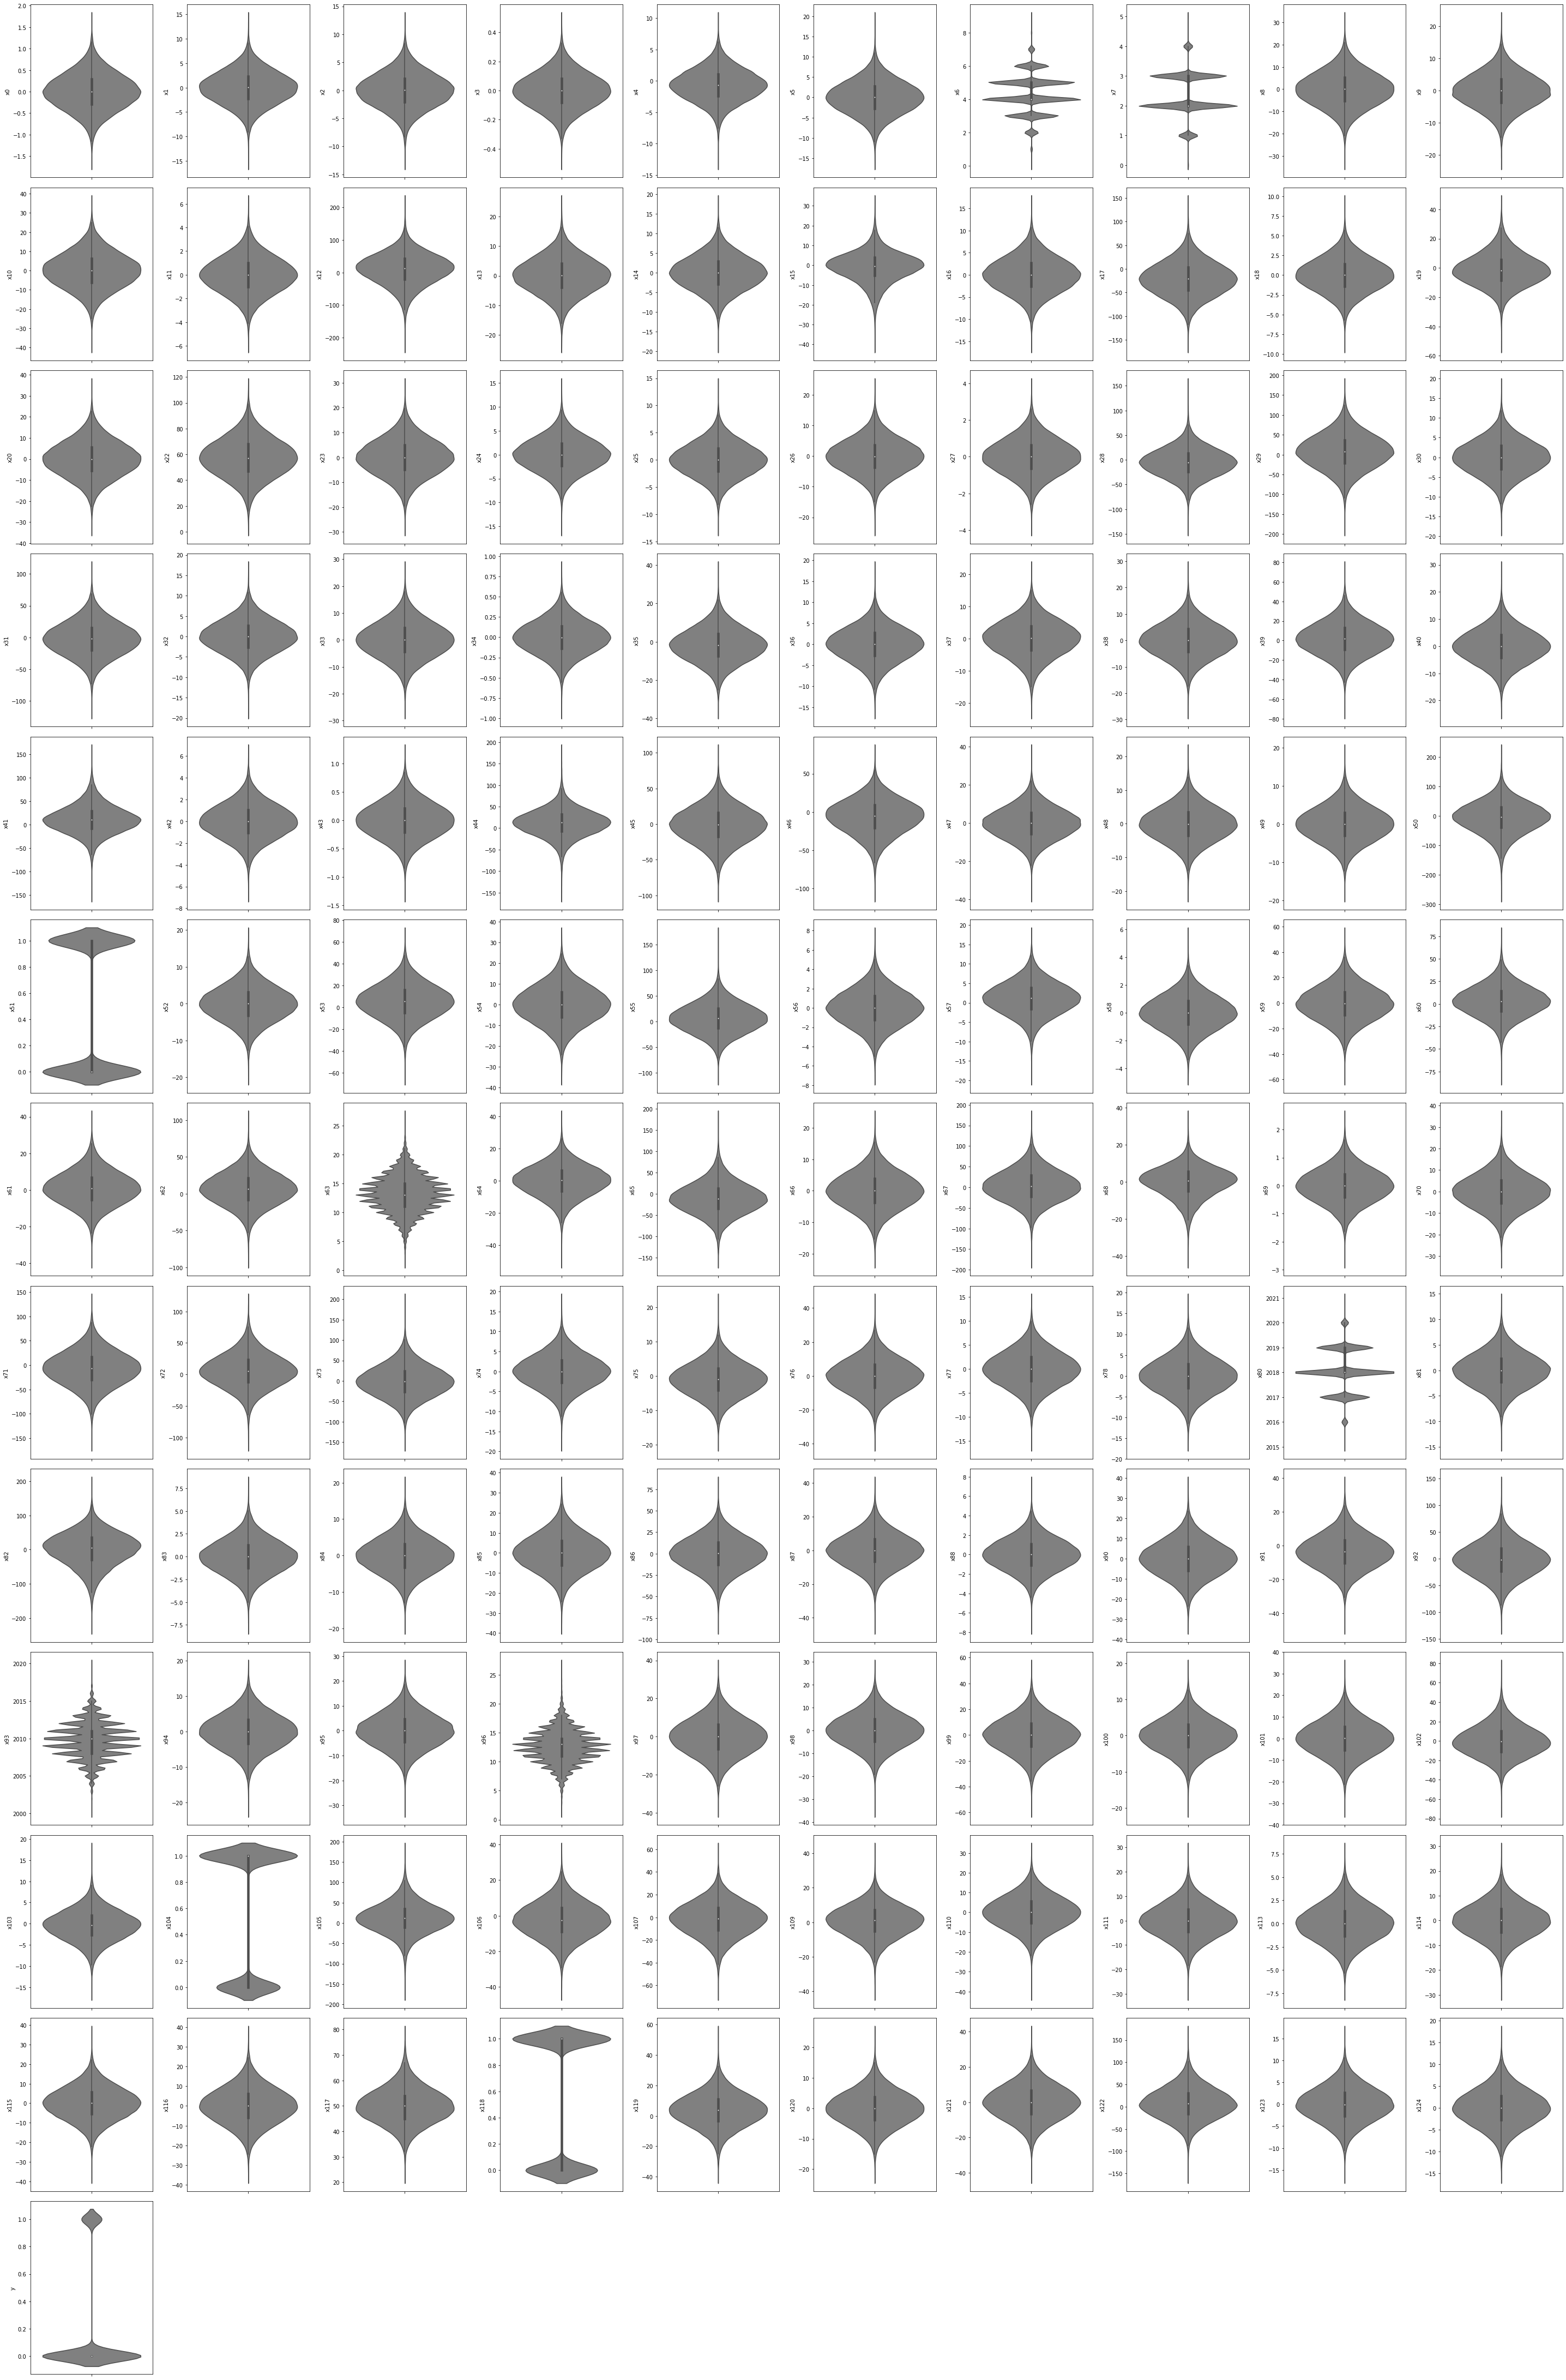

In [23]:
# Numerikal

plt.figure(figsize=(40,70))
for i in range(0, len(nums)):
    plt.subplot(15,10, i+1)
    sns.violinplot(y=numerikal_train[nums[i]], color='gray', orient='v')
    plt.tight_layout()

#### Hasil Pengamatan Violin Plot

Pengamatan:
1. Sebaran data numerical cenderung normal.
2. Kolom y, x118, x104, dan x51 ternyata bernilai boolean.
3. Terindikasi Outlier di berbagai kolom.

Tindak Lanjut:
1. Perhatikan apakah perlu dilakukan outlier handling, apakah model lebih baik dengan atau tanpa outlier.

### Count plot (kategorikal)

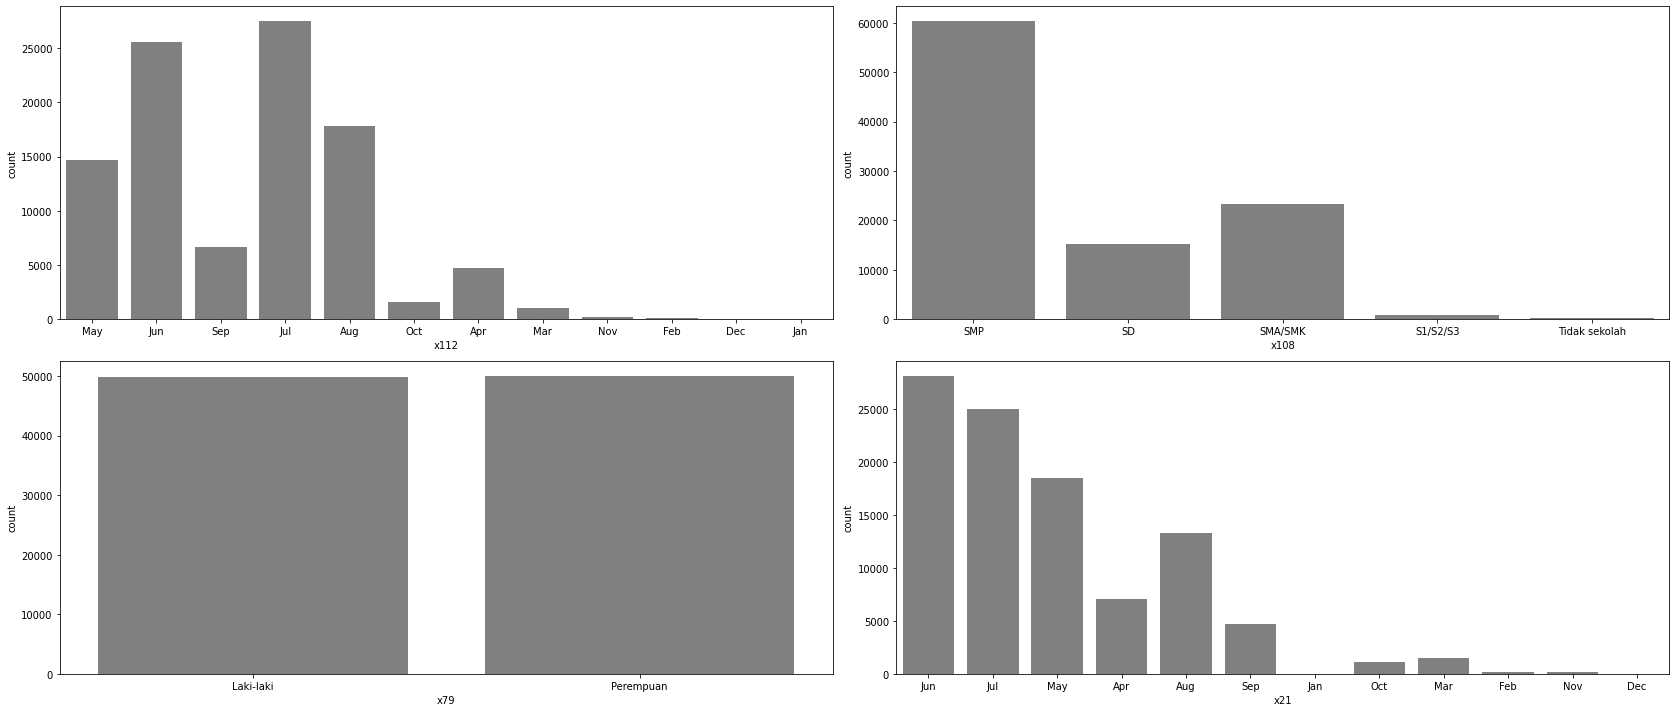

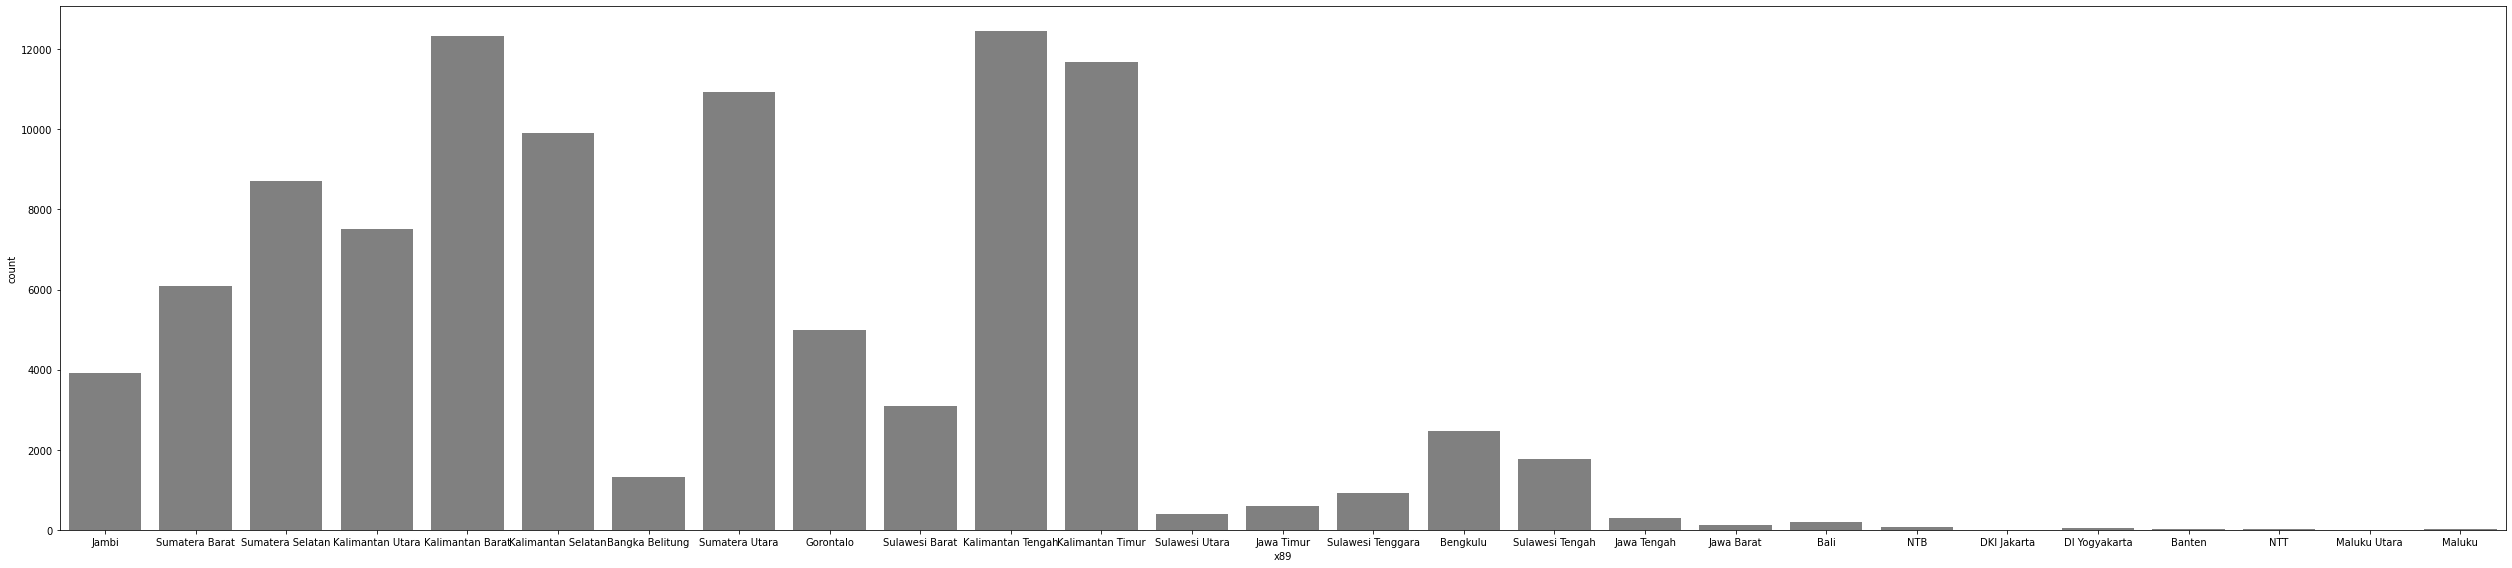

In [24]:
# kategorikal

plt.figure(figsize=(35,10))
for i in range (0, 5):
    if i != 2:
        plt.subplot(2,3,i+1)
        sns.countplot(x=kategorikal_train[cats[i]],color='grey')
        plt.tight_layout()
        
plt.show()
plt.figure(figsize=(35,8))
sns.countplot(x=kategorikal_train['x89'],color='grey')
plt.tight_layout()

#### Hasil Pengamatan Count Plot

Pengamatan:

1. Pada kolom x112 dan x21 data juli dan juni menjadi yang terbesar.
2. Pada kolom x108 data SMP paling besar.
3. Kolom x79 data laki - laki dan perempuan hampir sama.
4. Kolom x89 menunjukkan data daerah dengan kalimantan tengah, kalimantan barat, dan kalimantan timur paling banyak.
5. terdapat beberapa kolom yang memiliki unique value dalam jumlah banyak (>10) yaitu kolom x112, x89, dan x21.
6. Kolom x89 dan x79 bertipe kategorikal nominal, kolom x112, x108, dan x21 bertipe kategorikal ordinal.


Tindak Lanjut:
1. Pada saat feature encoding, gunkan one hot encoding untuk kolom dengan tipe data nominal (x89 dan x79) dan label encoding untuk kolom dengan tipe data ordinal (x112, x108, dan x21)
2. Pertimbangkan untuk membuang data dengan kolom yang memiliki tipe data nominal dengan unique value yang besar dan kolom dengan nilai frequensi kategori top timpang dengan data lain.

## Bivariate Analysis

#### Correlation heatmap

In [25]:
# Dataframe train yang berisi data numerik

numerikal_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


In [26]:
korelasi_num= numerikal_train.corr()

korelasi_y = korelasi_num.loc[:,'y'] # memunculkan data korelasi label dengan feature saja
korelasi_y.head()

df_korelasi = pd.DataFrame({'y':korelasi_y},
                           index=nums)

df_korelasi= df_korelasi.drop(index='y')

<AxesSubplot:>

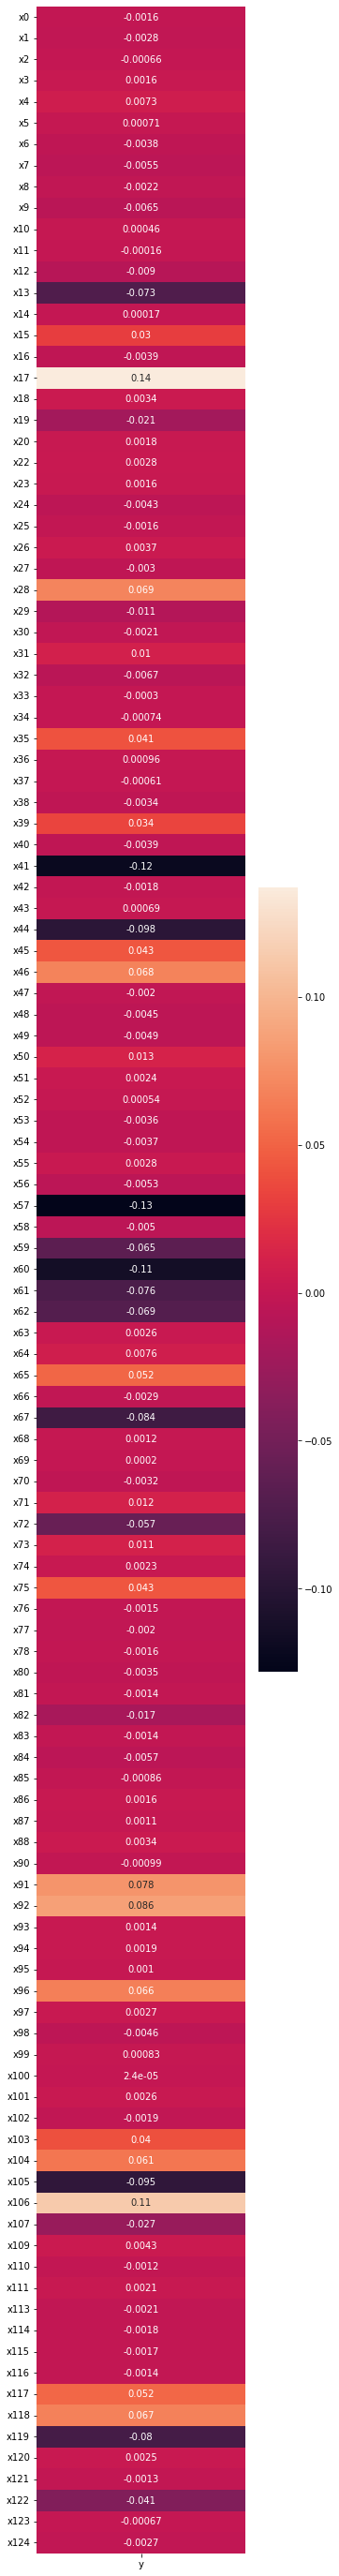

In [27]:
plt.figure(figsize=(5,50))
sns.heatmap(data=df_korelasi,annot=True)
# plt.show()

##### Hasil Pengamatan Correlation Heatmap

Pengamatan:

1. Hubungan antar kolom label dan fitur berdasar korelasi cenderung sangat kecil.

Tindak Lanjut:
1. Tentukan kolom yang akan digunakan untuk modelling.
2. Gunakan metode selain korelasi pearson untuk menentukan feature, bisa Recursive Feature Elimination atau Principal Component Analysis.

#### Category Columns VS Target Variable

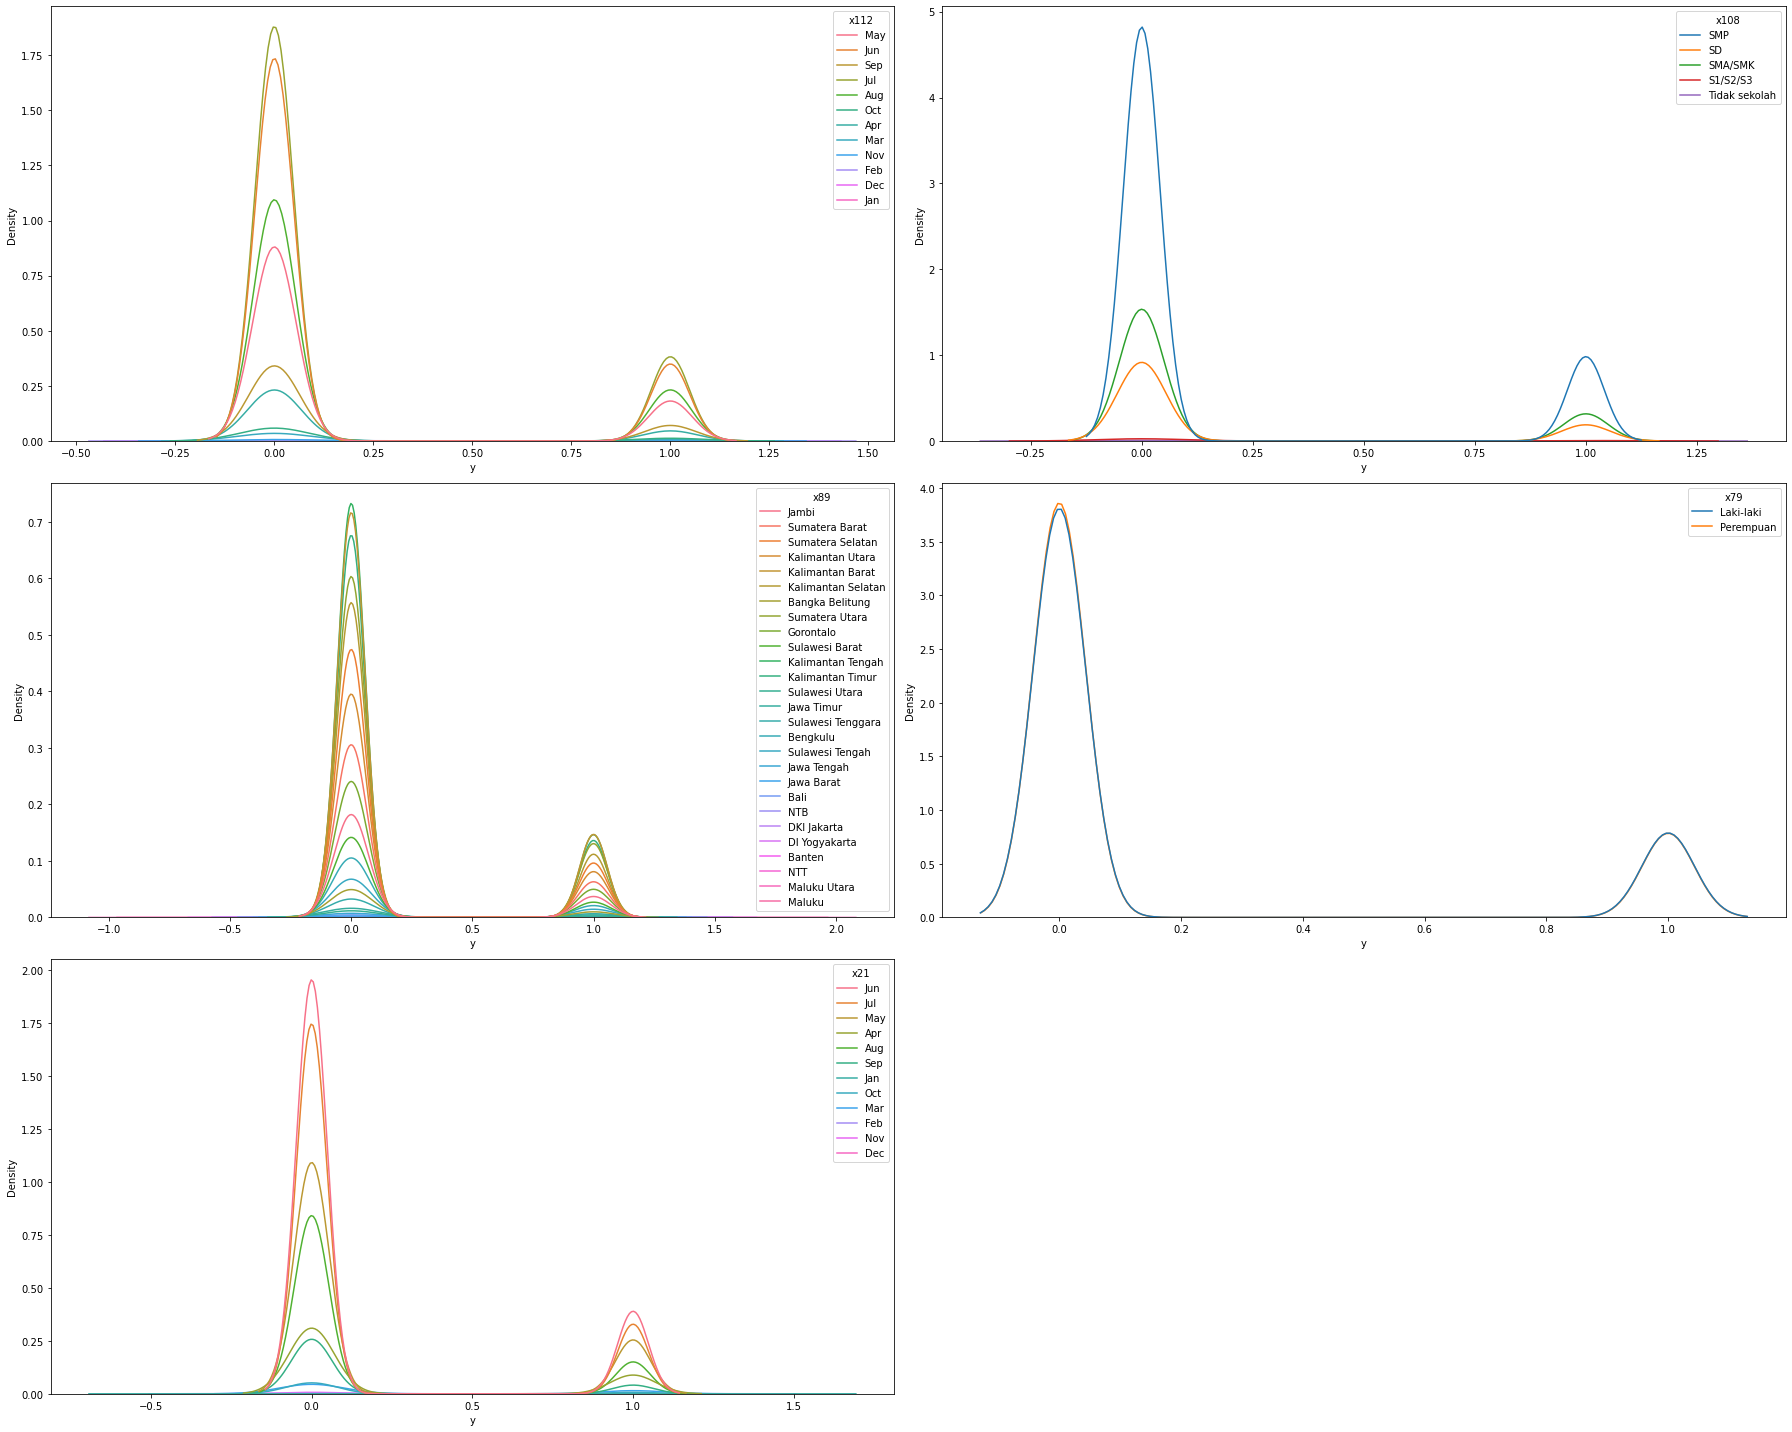

In [28]:
# kategorikal

plt.figure(figsize=(25,20))
for i in range (0, 5):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=kategorikal_train,x=numerikal_train['y'],hue=kategorikal_train[cats[i]],warn_singular=False)
    plt.tight_layout()

##### Hasil Pengamatan Category column vs Target Variable

Pengamatan:

1. Grafik kolom x21, x89, dan x112 menunjukkan kardinalitas (jumlah unique values) yang cukup tinggi. 
2. Grafik x79 menunjukkan bahwa laki - laki dan perempuan memiliki kemungkinan yang hampir sama untuk dapat churn.
3. Grafik x108 menunjukkan bahwa SMP menjadi potensi churn terbesar berdasarkan data yang ada, dengan jumlah yang timpang.

Tindak Lanjut:

1. Grafik x89 yang bertipe kategorikal nominal memiliki unique value dalam jumlah besar, pertimbangkan untuk didrop.
2. Grafik x108 menunjukkan adanya ketimpangan antara data modus dengan yang lainnya, pertimbangkan untuk drop kolom.

## EDA Conclusion

Beberapa hal yang ditemukan dari hasil EDA dataset adalah:

1. Data sudah dinormalisasi, dengan 5 kolom fitur yang bertipe object yang harus diencoding.
2. Data dengan kategori numerikal menyebar secara normal.
3. Data terdiri dari 100000 baris dan 126 kolom, Terdapat Null Value pada data, dengan persentase maksimal 0.159%, dan secara keseluruhan mencapai 16%.
4. Kolom data numerikal memiliki missing value sebesar 15.375% dan kolom data kategorikal memiliki 0.649%, isi missing value data numerikal dengan nilai mean masing masing kolom karena sebaran normal, drop missing value pada kategorikal karena hanya bernilai 0.649%.
5. Data memiliki dimensi yang besar, pastikan untuk melaksankan feature selection.
6. Data tidak memiliki duplikat secara keseluruhan, namun terdapat duplikasi antara kolom x21 dan x112, drop salah satu kolom.
7. Kolom x89 dan x79 bertipe kategorikal nominal, kolom x112, x108, dan x21 bertipe kategorikal ordinal, lakukan one hot encoding untuk kolom x89 dan label encoding untuk x79 karena value bernilai biner, label encoding untuk seluruh kolom dengan tipe ordinal. 
8. Pada data kategorikal didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan (`x79`) dan SMP (`x108`),
   Kolom 'x112','x89', dan 'x21' memiliki kardinalitas (jumlah unique values) yang cukup tinggi (>10). 
9. Data pada kolom x108 memiliki jumlah yang timpang antara kategori SMP dan yang lainnya, disarankan untuk drop kolom.
10. Data pada label memiliki jumlah yang timpang, >80% kategori 0. Pertimbangkan untuk analisis imbalance data handling menggunakan metode under sampling, over sampling, SMOTE, apakah performa model lebih baik daripada menggunakan data original.
11. Berdasarkan analisa univariate (violin plot) seluruh data numerikal terindikasi menyebar secara normal dan memiliki outlier.
12. Pada data numerikal, hubungan antar kolom label dan fitur berdasar korelasi cenderung kecil. 

# Data Pre-processing

## Missing Value

### Cuplikan Data

In [29]:
numerikal_train.isnull().sum()

x0      123
x1      131
x2      124
x3      115
x4      137
       ... 
x121    129
x122    127
x123    130
x124    123
y         0
Length: 121, dtype: int64

In [30]:
numerikal_test.isnull().sum()

x0      40
x1      30
x2      26
x3      27
x4      39
        ..
x120    38
x121    39
x122    34
x123    46
x124    42
Length: 120, dtype: int64

In [31]:
kategorikal_train.isnull().sum()

x112    142
x108    138
x89     125
x79     118
x21     126
dtype: int64

In [32]:
kategorikal_test.isnull().sum()

x112    28
x108    29
x89     39
x79     31
x21     34
dtype: int64

### Handling

In [33]:
# numerikal

numerikal_train = numerikal_train.fillna(numerikal_train.mean()) # isi baris baris bernilai null dengan mean
numerikal_test = numerikal_test.fillna(numerikal_test.mean()) # isi baris baris bernilai null dengan mean

In [34]:
# kategorikal

kategorikal_train = kategorikal_train.dropna() # drop baris bernilai null
kategorikal_test = kategorikal_test.dropna() # drop baris bernilai null

## Duplicated Data

### Cuplikan Data

In [35]:
df_train.duplicated().any()

False

In [36]:
df_train.duplicated(subset=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x22','x23','x24','x25','x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50']).sum()

0

In [37]:
df_train.duplicated(subset=['x21','x112']).sum()

99866

### Handling

Terdapat data duplikat sebanyak 99866 (99.87%) pada data kolom x21 dan x112. Maka akan dipilih salah satu untuk dimasukan ke dalam dataframe pada bagian "Concat Column numerikal dan kategorikal".

## Outliers Handling

### Cuplikan Data

In [38]:
len(numerikal_train)


filtered_entries = np.array([True] * len(numerikal_train))

for col in nums[:-1]:
    zscore = abs(stats.zscore(numerikal_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    outlier = numerikal_train[nums[:-1]][filtered_entries] # filter, ambil yang z-scorenya dibawah 3
        
outlier.reset_index(drop=True) 

len(outlier)
print(f'Jumlah baris yang terindikasi terdapat data outlier: {len(numerikal_train)-len(outlier)}')

Jumlah baris yang terindikasi terdapat data outlier: 25890


### Handling

Terdapat outlier pada baris tertentu, namun berdasarkan analisis univariate, Outlier terlihat wajar, tidak ada indikasi kesalahan input nilai. Sehingga tidak dilakukan outlier handling.

## Feature Encoding

### Cuplikan Data

In [39]:
print(df_train[cats]['x112'].value_counts(),'\n')
print(df_train[cats]['x108'].value_counts(),'\n')
print(df_train[cats]['x89'].value_counts(),'\n')
print(df_train[cats]['x79'].value_counts(),'\n')
print(df_train[cats]['x21'].value_counts(),'\n')

Jul    27476
Jun    25591
Aug    17806
May    14682
Sep     6668
Apr     4747
Oct     1550
Mar      991
Nov      218
Feb      111
Dec       16
Jan        2
Name: x112, dtype: int64 

SMP              60285
SMA/SMK          23334
SD               15166
S1/S2/S3           773
Tidak sekolah      304
Name: x108, dtype: int64 

Kalimantan Tengah     12449
Kalimantan Barat      12343
Kalimantan Timur      11678
Sumatera Utara        10943
Kalimantan Selatan     9921
Sumatera Selatan       8715
Kalimantan Utara       7519
Sumatera Barat         6086
Gorontalo              4991
Jambi                  3926
Sulawesi Barat         3099
Bengkulu               2465
Sulawesi Tengah        1757
Bangka Belitung        1313
Sulawesi Tenggara       929
Jawa Timur              592
Sulawesi Utara          404
Jawa Tengah             284
Bali                    183
Jawa Barat              121
NTB                      61
DI Yogyakarta            41
NTT                      26
Banten                   11
Mal

label encoding x108 dan x79

### Label Encoding

In [40]:
mapping_x79 = {
    'Perempuan' : 0,
    'Laki-laki' : 1
}

mapping_x108 = {
    'Tidak sekolah' : 0,
    'SD' : 1,
    'SMP' : 2,
    'SMA/SMK' : 3,
    'S1/S2/S3' : 4
}

mapping_x112 = {
    'Jan' : 0, 'Feb' : 1, 'Mar' : 2, 'Apr' : 3,  
    'May' : 4, 'Jun' : 5, 'Jul' : 6, 'Aug' : 7,   
    'Sep' : 8, 'Oct' : 9, 'Nov' : 10, 'Dec' : 11   
}

mapping_x21 = {
    'Jan' : 0, 'Feb' : 1, 'Mar' : 2, 'Apr' : 3,  
    'May' : 4, 'Jun' : 5, 'Jul' : 6, 'Aug' : 7,   
    'Sep' : 8, 'Oct' : 9, 'Nov' : 10, 'Dec' : 11   
}



kategorikal_train['x79'] = kategorikal_train['x79'].map(mapping_x79)
# kategorikal_train['x108'] = kategorikal_train['x108'].map(mapping_x108) ## tidak ditampilkan karena hasil analisis count plot tidak masuk pilihan (ada ketimpangan data)
# kategorikal_train['x112'] = kategorikal_train['x112'].map(mapping_x112) ## tidak ditampilkan karena hasil analisis count plot tidak masuk pilihan (memiliki nilai yang hampir sama dengan x21)
kategorikal_train['x21'] = kategorikal_train['x21'].map(mapping_x21)

kategorikal_test['x79'] = kategorikal_test['x79'].map(mapping_x79)
# kategorikal_test['x108'] = kategorikal_test['x108'].map(mapping_x108) ## tidak ditampilkan karena hasil analisis count plot tidak masuk pilihan (ada ketimpangan data)
# kategorikal_test['x112'] = kategorikal_test['x112'].map(mapping_x112) ## tidak ditampilkan karena hasil analisis count plot tidak masuk pilihan (memiliki nilai yang hampir sama dengan x21)
kategorikal_test['x21'] = kategorikal_test['x21'].map(mapping_x21)

## Concat Column numerikal dan kategorikal

In [41]:
train_fix = pd.concat([kategorikal_train[['x21','x79']],numerikal_train],axis = 1).reset_index(drop=True)
test_fix = pd.concat([kategorikal_test[['x21','x79']],numerikal_test],axis = 1).reset_index(drop=True)

In [42]:
train_fix = train_fix.dropna().reset_index(drop=True) # menghilangkan nilai null akibat dari penyatuan data numerikal dan kategorikal
test_fix = test_fix.dropna().reset_index(drop=True)

### Cuplikan Data

In [43]:
train_fix.head()

,x21,x79,x0,x1,x2,x3,x4,x5,x6,x7,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,5.0,1.0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,6.0,0.0,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,6.0,0.0,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,5.0,1.0,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,6.0,1.0,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


In [44]:
test_fix.head()

,x21,x79,x0,x1,x2,x3,x4,x5,x6,x7,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
0,6.0,1.0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,...,3.580278,-7.765934,59.0,1.0,-9.897690,5.694125,-6.734618,17.052251,3.601040,2.873498
1,6.0,1.0,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,...,5.783655,15.667015,47.0,1.0,7.781887,9.752716,5.918369,15.922908,5.460557,10.475816
2,5.0,1.0,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,...,-0.389116,8.523648,55.0,0.0,6.815214,-3.325532,4.123546,-19.656038,8.380318,-1.203315
3,8.0,0.0,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,...,3.930974,-13.912115,41.0,0.0,3.158137,-7.088875,-3.035983,34.277048,-3.169203,1.417681
4,2.0,0.0,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,...,-4.056091,-14.432712,52.0,0.0,-3.867657,-13.308519,1.008302,41.449381,-0.804560,-0.649453


## Imbalance Data

In [45]:
# Divide datset

X_train = train_fix.iloc[:, :-1]
y_train = train_fix.iloc[:, -1]

X_test = test_fix

In [46]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=1)

In [47]:
X_train_under, y_train_under = under_sampling.RandomUnderSampler(sampling_strategy= 0.5,random_state=1).fit_resample(Xtrain, ytrain)
X_train_over, y_train_over = over_sampling.RandomOverSampler(sampling_strategy= 0.5,random_state=1).fit_resample(Xtrain, ytrain)
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE(random_state=1).fit_resample(Xtrain, ytrain)

In [48]:
print('Original')
print(pd.Series(y_train).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_train_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_train_over).value_counts())
print('SMOTE')
print(pd.Series(y_train_SMOTE).value_counts())

Original
0    82463
1    16888
Name: y, dtype: int64
UNDERSAMPLING
0    26918
1    13459
Name: y, dtype: int64
OVERSAMPLING
0    66021
1    33010
Name: y, dtype: int64
SMOTE
0    66021
1    66021
Name: y, dtype: int64


## Feature Reduction

In [49]:
pca = PCA(0.96,random_state=1) # mengurangi kolom hingga nilai variance menjadi 96%

In [50]:
print(f'Jumlah Kolom Sebelum dilaksanakan Principal Component Analysis (PCA): {len(Xtrain.columns)}')

pca.fit(Xtrain)
train_oke = pca.transform(Xtrain) # data hasil train_test_split dilaksanakan PCA
test_oke = pca.transform(Xtest) # data hasil train_test_split dilaksanakan PCA

print(f'Jumlah Kolom Setelah dilaksanakan Principal Component Analysis (PCA): {len(train_oke[0])}')

Jumlah Kolom Sebelum dilaksanakan Principal Component Analysis (PCA): 122
Jumlah Kolom Setelah dilaksanakan Principal Component Analysis (PCA): 26


In [51]:
print(f'Jumlah Kolom Sebelum dilaksanakan Principal Component Analysis (PCA): {len(X_test.columns)}')

pca.fit(X_test)
X_test_oke = pca.transform(X_test)

print(f'Jumlah Kolom Setelah dilaksanakan Principal Component Analysis (PCA): {len(X_test_oke[0])}')

Jumlah Kolom Sebelum dilaksanakan Principal Component Analysis (PCA): 122
Jumlah Kolom Setelah dilaksanakan Principal Component Analysis (PCA): 26


# Machine Learning Modeling

## Random Forest

In [52]:
model_rf = RandomForestClassifier(n_estimators=65,max_depth=8,min_samples_split=5)
model_rf.fit(train_oke, ytrain)
y_pred_rf = model_rf.predict(test_oke)
y_pred_train_rf = model_rf.predict(train_oke)

## Logistic Regression

In [53]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(train_oke, ytrain)
y_pred_lr = model_lr.predict(test_oke)
y_pred_train_lr = model_lr.predict(train_oke)

## KNeighbors

In [54]:
model_kn = KNeighborsClassifier(n_neighbors=120)
model_kn.fit(train_oke, ytrain)
y_pred_kn = model_kn.predict(test_oke)
y_pred_train_kn = model_kn.predict(train_oke)

## Decision Tree

In [55]:
model_dtc = DecisionTreeClassifier(max_depth=8,max_features=22,random_state=42)
model_dtc.fit(train_oke, ytrain)
y_pred_dtc = model_dtc.predict(test_oke)
y_pred_train_dtc = model_dtc.predict(train_oke)

## CatBoost

In [56]:
model_cb = CatBoostClassifier(verbose=False, random_state=42,iterations=28,depth=6)
model_cb.fit(train_oke,ytrain)
y_pred_cb = model_cb.predict(test_oke)
y_pred_train_cb = model_cb.predict(train_oke)

## LightGBM

In [57]:
model_lgbm = LGBMClassifier(n_estimators=35,max_depth=10,random_state=42)
model_lgbm.fit(train_oke,ytrain)
y_pred_lgbm = model_lgbm.predict(test_oke)
y_pred_train_lgbm = model_lgbm.predict(train_oke)

# Machine Learning Evaluation

## Random Forest

In [58]:
probs_rf = model_rf.predict_proba(test_oke)
auc_rf = roc_auc_score(ytest,probs_rf[:,1])

probs_train_rf = model_rf.predict_proba(train_oke)
auc_train_rf = roc_auc_score(ytrain,probs_train_rf[:,1])

print('RandomForestClassifier Original - auc score test: {} dan train : {}'.format(auc_rf, auc_train_rf))

RandomForestClassifier Original - auc score test: 0.7302199528914864 dan train : 0.7559669808064804


## Logistic Regression

In [59]:
probs_lr = model_lr.predict_proba(test_oke)
auc_lr = roc_auc_score(ytest,probs_lr[:,1])

probs_train_lr = model_lr.predict_proba(train_oke)
auc_train_lr = roc_auc_score(ytrain,probs_train_lr[:,1])

print('LogisticRegression Original - auc score test: {} dan train: {}'.format(auc_lr,auc_train_lr))

LogisticRegression Original - auc score test: 0.6355342279899803 dan train: 0.6350324161515571


## KNeighbors

In [60]:
probs_kn = model_kn.predict_proba(test_oke)
auc_kn = roc_auc_score(ytest,probs_kn[:,1])

probs_kn_train = model_kn.predict_proba(train_oke)
auc_kn_train = roc_auc_score(ytrain,probs_kn_train[:,1])

print('KNeighborsClassifier Original - auc score test: {} dan train: {}'.format(auc_kn,auc_kn_train))

KNeighborsClassifier Original - auc score test: 0.7626036859632501 dan train: 0.7880278017302229


## Decision Tree

In [61]:
probs_dtc = model_dtc.predict_proba(test_oke)
auc_dtc = roc_auc_score(ytest,probs_dtc[:,1])

probs_dtc_train = model_dtc.predict_proba(train_oke)
auc_dtc_train = roc_auc_score(ytrain,probs_dtc_train[:,1])

print('DecissionTreeClassifier Original- auc score test: {} dan train: {}'.format(auc_dtc,auc_dtc_train))

DecissionTreeClassifier Original- auc score test: 0.6728645359037373 dan train: 0.6907129352294396


## CatBoost

In [62]:
probs_cb = model_cb.predict_proba(test_oke)
auc_cb = roc_auc_score(ytest,probs_cb[:,1])

probs_cb_train = model_cb.predict_proba(train_oke)
auc_cb_train = roc_auc_score(ytrain,probs_cb_train[:,1])

print('CatBoostClassifier Original- auc score test: {} dan train: {}'.format(auc_cb,auc_cb_train))

CatBoostClassifier Original- auc score test: 0.7526041591839093 dan train: 0.7796710869865666


## LightGBM

In [63]:
probs_lgbm = model_lgbm.predict_proba(test_oke)
auc_lgbm = roc_auc_score(ytest,probs_lgbm[:,1])

probs_lgbm_train = model_lgbm.predict_proba(train_oke)
auc_lgbm_train = roc_auc_score(ytrain,probs_lgbm_train[:,1])

print('LGBMClassifier Original - auc score test: {} dan train: {}'.format(auc_lgbm,auc_lgbm_train))

LGBMClassifier Original - auc score test: 0.750918780613235 dan train: 0.7790926056519927


## Tabulasi Hasil Evaluasi Machine Learning

In [64]:
tabulasi_ml = pd.DataFrame({'Test': [auc_rf, auc_kn, auc_dtc, auc_cb, auc_lgbm],
                            'Train': [auc_train_rf, auc_kn_train, auc_dtc_train, auc_cb_train, auc_lgbm_train]},
                            index= ['Random_Forest', 'KNeighbors', 'Decision_Tree', 'CatBoost', 'LightGBM'])

In [65]:
tabulasi_ml

,Test,Train
Random_Forest,0.730220,0.755967
KNeighbors,0.762604,0.788028
Decision_Tree,0.672865,0.690713
CatBoost,0.752604,0.779671
LightGBM,0.750919,0.779093


Keputusan:
Berdasarkan hasil evaluasi beberapa model machine learning, dipilih model KNeighbors sebagai model prediksi data test.

## Keputusan Penggunaan Model Machine Learning

In [66]:
# original data
pca.fit(Xtrain)
train_oke = pca.transform(Xtrain)
test_oke = pca.transform(Xtest)

model_kn = KNeighborsClassifier(n_neighbors=120)
model_kn.fit(train_oke, ytrain)
y_pred_kn = model_kn.predict(test_oke)

probs_kn = model_kn.predict_proba(test_oke)
auc_kn = roc_auc_score(ytest,probs_kn[:,1])

# under sampling
pca.fit(X_train_under)
train_oke1 = pca.transform(X_train_under)
test_oke1 = pca.transform(Xtest)

model_kn.fit(train_oke1, y_train_under)
y_pred_kn_under = model_kn.predict(test_oke1)

probs_kn_under = model_kn.predict_proba(test_oke1)
auc_kn_under = roc_auc_score(ytest,probs_kn_under[:,1])

# over sampling
pca.fit(X_train_over)
train_oke2 = pca.transform(X_train_over)
test_oke2 = pca.transform(Xtest)

model_kn.fit(train_oke2, y_train_over)
y_pred_kn_over = model_kn.predict(test_oke2)

probs_kn_over = model_kn.predict_proba(test_oke2)
auc_kn_over = roc_auc_score(ytest,probs_kn_over[:,1])

# SMOTE
pca.fit(X_train_SMOTE)
train_oke3 = pca.transform(X_train_SMOTE)
test_oke3 = pca.transform(Xtest)

model_kn.fit(train_oke3, y_train_SMOTE)
y_pred_kn_SMOTE = model_kn.predict(test_oke3)

probs_kn_SMOTE = model_kn.predict_proba(test_oke3)
auc_kn_SMOTE = roc_auc_score(ytest,probs_kn_SMOTE[:,1])


print('KNeighborsClassifier Original - auc score test: {}'.format(auc_kn))
print('KNeighborsClassifier Under    - auc score test: {}'.format(auc_kn_under))
print('KNeighborsClassifier Over     - auc score test: {}'.format(auc_kn_over))
print('KNeighborsClassifier SMOTE    - auc score test: {}'.format(auc_kn_SMOTE))

KNeighborsClassifier Original - auc score test: 0.7626036859632501
KNeighborsClassifier Under    - auc score test: 0.7567492830476432
KNeighborsClassifier Over     - auc score test: 0.7615149059718709
KNeighborsClassifier SMOTE    - auc score test: 0.7600939935421342


Keputusan:
Model Machine Learning KNeighbors tanpa imbalance data handling.

# Submission

In [ ]:
# model terbaik (KNeighbors)

model_kn_dftest = KNeighborsClassifier(n_neighbors=120)
model_kn_dftest.fit(train_oke, ytrain)
y_pred_kn_dftest = model_kn_dftest.predict(X_test_oke)

In [ ]:
prediksi = pd.DataFrame(data=y_pred_kn_dftest).reset_index()
prediksi.columns = ['Id','Predicted']

In [ ]:
prediksi.sample(10)

In [ ]:
prediksi.to_csv('nadiana_yemin_mukti-submission.csv',index=False)

In [ ]:
# X_train.to_csv('df_train.csv',index=False)
# y_train.to_csv('df_train_label.csv',index=False)

In [ ]:
# X_test.to_csv('df_test.csv',index=False)